# Lab 3.2: Лінійна фільтрація зображень. Виділення границь об'єктів
### Шевченко Юлія, ФІ-31мн

In [1]:
# All the imports for the task
import cv2
import numpy as np
from matplotlib import pyplot as plt

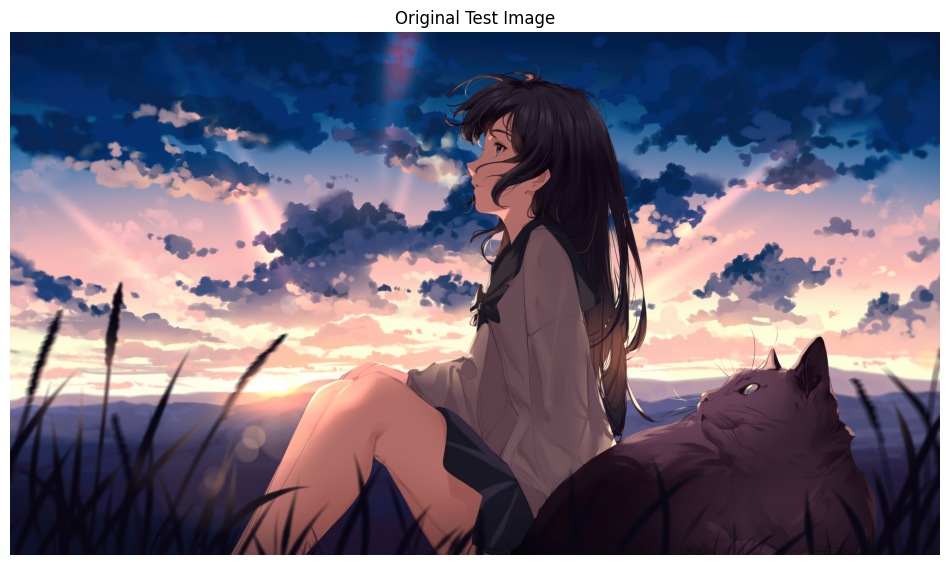

In [2]:
# Loading the test image
image_path = '../Lab_3/img.jpg'
test_img = cv2.imread(image_path)

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(12, 8))
plt.imshow(test_img)
plt.title('Original Test Image')
plt.axis('off')
plt.show()

In [3]:
def comparison_plot(original_image, my_processed_image, processed_image, title: str):
    """
    Plots the original and processed images side by side.

    Args:
        original_image: The original image to be plotted.
        my_processed_image: The processed image by my functions to be plotted.
        processed_image: The processed image by implemented functions to be plotted.
        title (str): The title for the processed image plot.

    Returns:
        Comparison plot of three images
    """
    # Plot the original image
    plt.figure(figsize=(12, 8))
    plt.imshow(original_image)
    plt.title('Original Image'.format(title))
    plt.axis('off')
    plt.show()
    
    # Plot the processed image by my functions
    plt.figure(figsize=(12, 8))
    plt.imshow(my_processed_image)
    plt.title('My Function Image: {}'.format(title))
    plt.axis('off')
    plt.show()
    
    # Plot the processed image by implemented functions
    plt.figure(figsize=(12, 8))
    plt.imshow(processed_image)
    plt.title('Implemented Function Image: {}'.format(title))
    plt.axis('off')
    plt.show()

## Gaussian Blur

Gaussian Blur is a popular image processing technique used for reducing image noise and blur. It operates by convolving the image with a Gaussian kernel, which applies a weighted average to the pixel values in the image. This weighted average ensures that nearby pixels contribute more significantly to the resulting pixel value, while distant pixels have a lesser impact. As a result, Gaussian Blur effectively smooths the image while preserving its overall structure and edges.

#### Key Characteristics and Considerations

- **Kernel Size**: The size of the Gaussian kernel determines the extent of blurring applied to the image. Larger kernel sizes result in more pronounced blurring, while smaller kernel sizes produce finer adjustments.

- **Standard Deviation (Sigma)**: The standard deviation of the Gaussian kernel controls the spread or width of the Gaussian distribution. Higher sigma values result in wider distributions and smoother blurring, while lower sigma values produce sharper transitions between pixels.

- **Effectiveness in Noise Reduction**: Gaussian Blur is particularly effective in reducing image noise, as it averages out variations in pixel intensity caused by noise. However, excessive blurring can lead to loss of fine details and image sharpness.

- **Edge Preservation**: Unlike some other blur techniques, such as mean or median blur, Gaussian Blur preserves the edges in the image while reducing blur. This is achieved through the weighted averaging process, which assigns higher weights to pixels closer to the target pixel, thereby maintaining edge clarity.

- **Computational Efficiency**: Gaussian Blur can be computationally intensive, especially for large kernel sizes or high-resolution images. However, efficient algorithms and optimizations are available to mitigate computational overhead.

Overall, Gaussian Blur is a versatile tool widely used in various image processing applications, including noise reduction, image smoothing, and pre-processing for subsequent analysis or feature extraction tasks. Understanding its parameters and effects is essential for achieving desired results and optimizing performance in image processing workflows.

In [4]:
def gaussian_kernel(kernel_size: int, sigma: float) -> np.ndarray:
    """
    Generates a 2D Gaussian kernel.

    Args:
        kernel_size (int): Size of the kernel.
        sigma (float): Standard deviation for Gaussian distribution.

    Returns:
        np.ndarray: 2D Gaussian kernel normalized to sum to 1.
    """
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 *sigma**2)), (kernel_size, kernel_size))

    return kernel / np.sum(kernel)  # Normalize the kernel

def convolve(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Applies convolution to the image with the given kernel.

    Args:
        image (np.ndarray): Input image.
        kernel (np.ndarray): Convolution kernel.

    Returns:
        np.ndarray: Convolved image.
    """
    kernel_size = len(kernel)
    padded_image = np.pad(image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='constant')
    convolved_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            convolved_image[i, j] = np.sum(padded_image[i : i + kernel_size, j : j + kernel_size] * kernel)

    return convolved_image

def gaussian_blur(image: np.ndarray, kernel_size: int, sigma: float) -> np.ndarray:
    """
    Applies Gaussian blur to the image.

    Args:
        image (np.ndarray): Input image.
        kernel_size (int): Size of the Gaussian kernel.
        sigma (float): Standard deviation for Gaussian distribution.

    Returns:
        np.ndarray: Blurred image.
    """
    kernel = gaussian_kernel(kernel_size, sigma)

    blurred_img = np.zeros_like(image, dtype=np.float64)
    for i in range(image.shape[2]):  # for each channel (assuming RGB)
        blurred_img[:, :, i] = convolve(image[:, :, i], kernel)

    return blurred_img.astype(np.uint8)

In [5]:
my_blurred_image = gaussian_blur(test_img, kernel_size=9, sigma=5)

blurred_image = cv2.GaussianBlur(test_img, ksize=(9, 9), sigmaX=5)

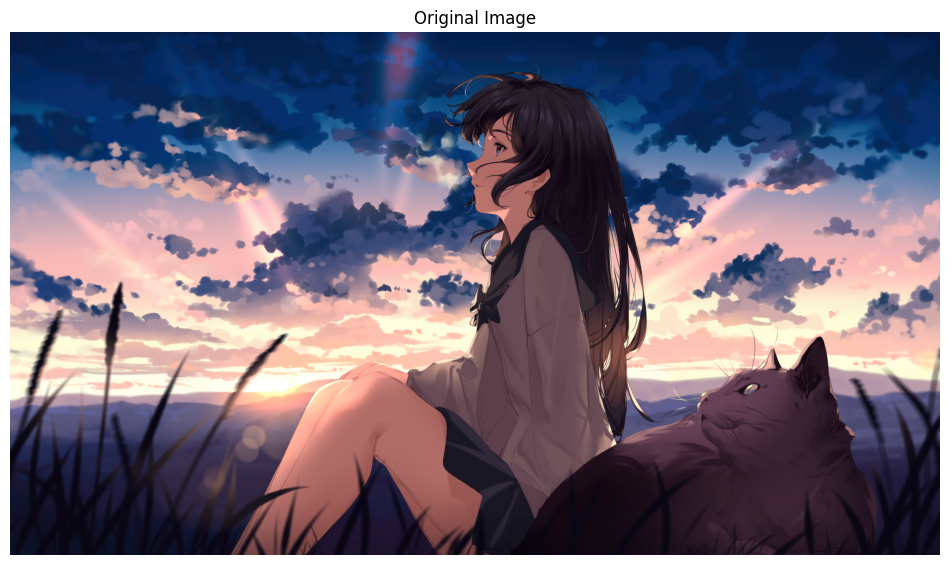

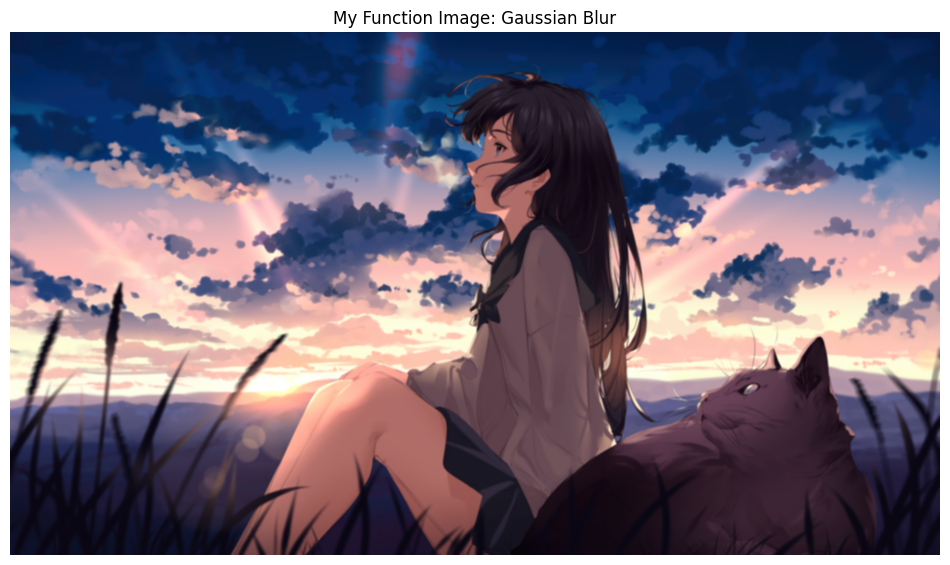

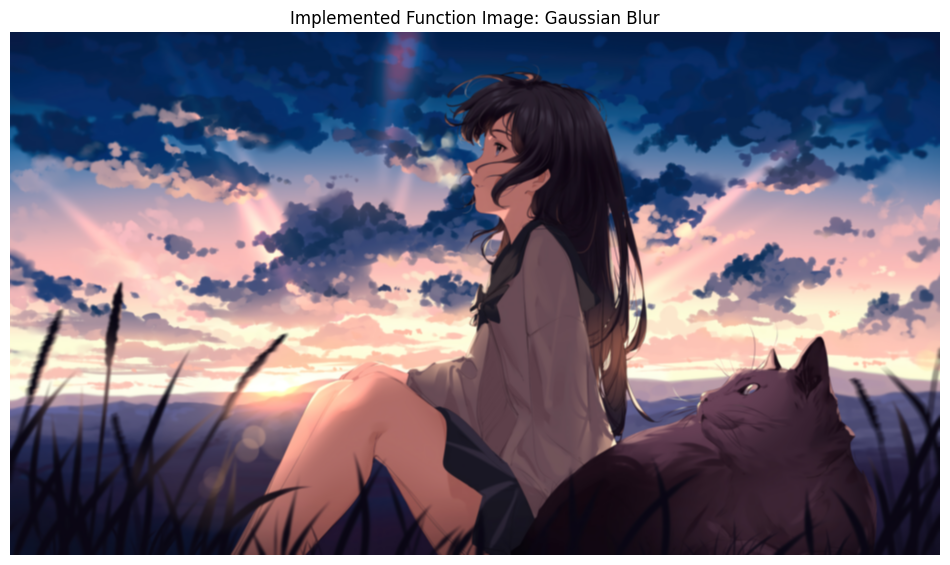

In [6]:
comparison_plot(test_img, blurred_image, blurred_image, 'Gaussian Blur')

## Sharpening Filter

A sharpening filter is a type of image processing filter used to enhance the clarity and detail of an image. It works by increasing the contrast between adjacent pixels, thus making edges and fine details more pronounced.

The sharpening filter is typically implemented as a convolution operation, where a small kernel is applied to each pixel of the image. One common sharpening kernel is the following:

|:--:|:--:|:--:|
| -1 | -1 | -1 |
| -1 |  9 | -1 |
| -1 | -1 | -1 |

This kernel emphasizes the center pixel by subtracting the surrounding pixel intensities and adding a multiple of the center pixel intensity back. The resulting effect is that edges and details are sharpened, making them more distinct.

#### Key Points:

- **Kernel Design**: The sharpening kernel is designed to enhance edges and details by increasing the contrast between neighboring pixels.
  
- **Effectiveness**: Sharpening filters are effective for improving the overall clarity and crispness of an image. However, excessive sharpening can lead to artifacts such as noise amplification or haloing around edges.

- **Parameter Tuning**: The effectiveness of the sharpening filter can be adjusted by modifying the kernel size and the weights assigned to each element of the kernel. Different kernel designs may produce varying degrees of sharpening effects.

- **Edge Preservation**: While sharpening filters enhance edge contrast, they may also amplify noise and other imperfections in the image. Care should be taken to balance the sharpening effect with the preservation of natural image features.

Overall, the sharpening filter is a valuable tool in image processing for enhancing image clarity and detail. Understanding its principles and characteristics is essential for effectively applying it to various types of images and achieving desired results.


In [7]:
def sharpening_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Applies sharpening filter to the image using convolution with the given kernel.

    Args:
        image (np.ndarray): Input image.
        kernel (np.ndarray): Convolution kernel for sharpening.

    Returns:
        np.ndarray: Sharpened image.
    """
    # Get image size
    image_height, image_width, channels = image.shape

    # Initialize output image
    sharpened_img = np.zeros_like(image)

    # Perform convolution for each channel
    for c in range(channels):
        # Convert channel to grayscale
        channel = image[:, :, c]

        # Calculate padding size
        kernel_height, kernel_width = kernel.shape
        pad_height = kernel_height // 2
        pad_width = kernel_width // 2

        # Pad the channel
        padded_channel = np.pad(channel, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

        # Perform convolution
        for y in range(image_height):
            for x in range(image_width):
                # Extract the region of interest (ROI) from the padded channel
                roi = padded_channel[y : y + kernel_height, x : x + kernel_width]
                # Element-wise multiplication of the ROI with the kernel
                convolved_pixel = np.sum(np.multiply(roi, kernel))
                # Set the convolved value in the output image
                sharpened_img[y, x, c] = np.clip(convolved_pixel, 0, 255)

    return sharpened_img.astype(np.uint8)

In [8]:
# Define the sharpening kernel
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

my_sharpened_image = sharpening_filter(test_img, kernel=sharpen_kernel)

sharpened_image = cv2.filter2D(test_img, ddepth=-1, kernel=sharpen_kernel) 

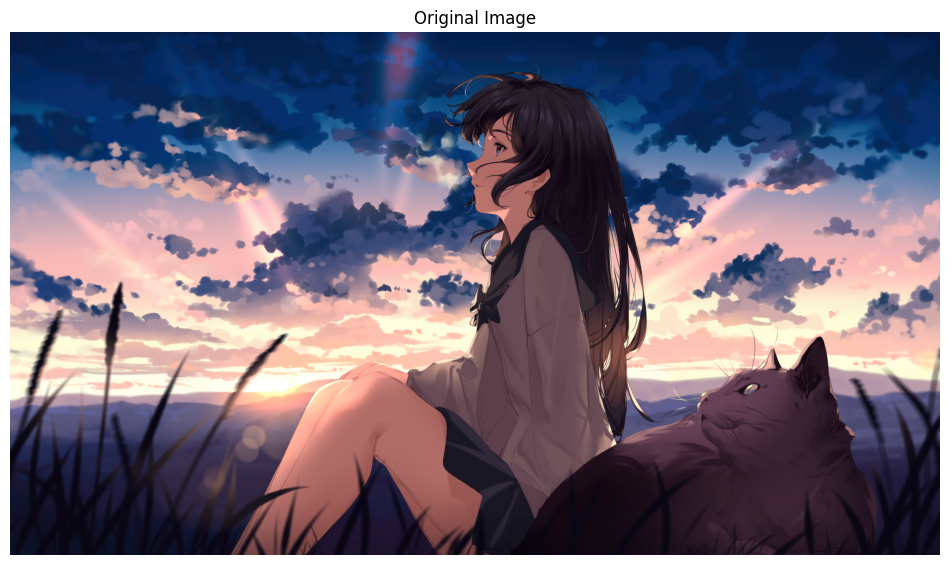

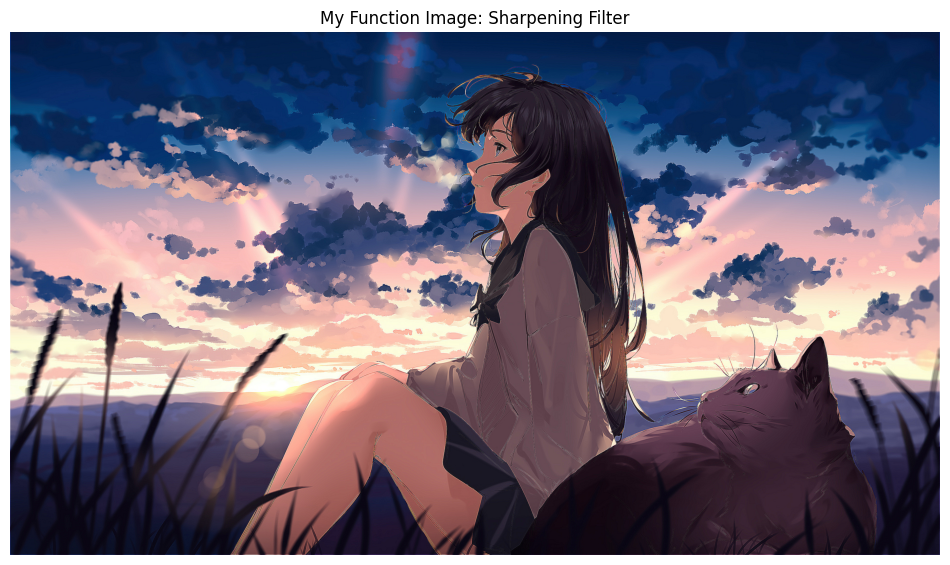

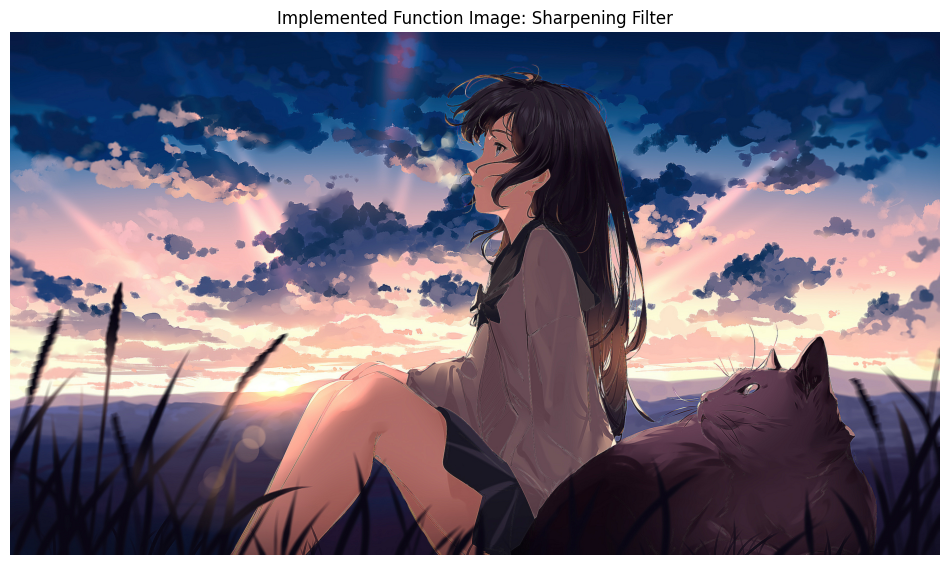

In [9]:
comparison_plot(test_img, my_sharpened_image, sharpened_image, 'Sharpening Filter')